In [7]:
import pandas as pd
import matplotlib.pyplot as plot
import os

DATA_DIR = 'data'
CSV_DIR = 'csv'

RESULTS_DIR = 'results'

In [8]:
# Importing data
read_path = os.path.join(DATA_DIR, CSV_DIR, 'backtest_data.csv')
data = pd.read_csv(read_path)

,Data
Total Gain,56.81%
Max Balance,$15728.65
Min Balance,$9792.2
Highest Gain,$341.05
Highest Loss,$-66.85
Average Gain,$18
Win/Loss,326/427


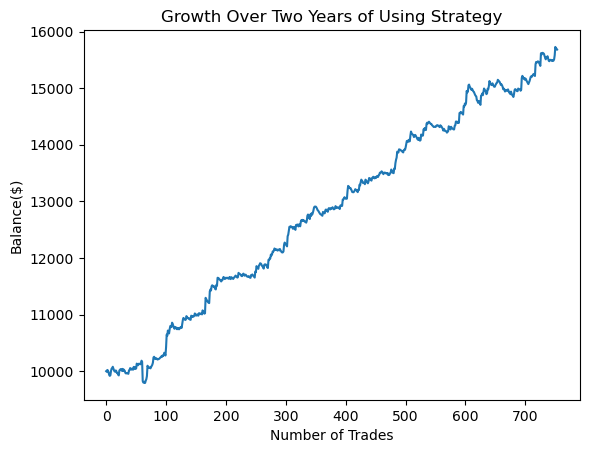

In [9]:
# Setting variables and lists
balance = 10000
pos_count, neg_count = 0, 0
balance_points = [10000]
g_l_list = []

for index, row in data.iterrows():
    """
    Looping through all rows of the dataframe and calculating profit or loss based on amount set for stake (1%)
    Calculates profit and loss based on recorded buy and sell value of the options retreieved
    """
    stake = balance / 100 # Calculate stake for each trade

    if row['call_buy'] == True:
        buy_price = row['call_prices'] # Buy price
        sell_price = data.at[(index+1, 'call_prices')] # Sell price
        p_l = sell_price - buy_price # P/L

        if p_l > 0: # If positive P/L
            pos_count += 1

            # Calculating gain/loss and adding to balance
            g_l = p_l * 100
            new_balance = balance + g_l

            g_l_list.append(g_l)
        elif p_l < 0:
            neg_count += 1

            # Calculating gain/loss and adding to balance
            g_l = p_l * 100
            new_balance = balance + g_l

            g_l_list.append(-g_l)
        else:
            continue

    
    elif row['put_buy'] == True:
        buy_price = row['put_prices'] # Buy price
        sell_price = data.at[(index+1, 'put_prices')] # Sell price
        p_l = sell_price - buy_price # P/L

        if p_l > 0:
            pos_count += 1

            # Calculating gain/loss and adding to balance
            g_l = p_l * 100
            new_balance = balance + g_l

            g_l_list.append(g_l)
        elif p_l < 0:
            neg_count += 1
            
            # Calculating gain/loss and adding to balance
            g_l = p_l * 100
            new_balance = balance + g_l

            g_l_list.append(g_l)
        else:
            continue
        
    else:
        continue
    
    # print(f'Trade {int((index+2)/2)}, Net: {round(new_balance - balance,2)}')
    balance = new_balance
    balance_points.append(balance)

# Calculting values used for summary
percent_gain = round(((balance - 10000) / 10000) * 100, 2)

columns = ['Total Gain', 'Max Balance', 'Min Balance', 'Highest Gain', 'Highest Loss', 'Average Gain', 'Win/Loss']
summary_data = [f'{percent_gain}%', f'${round(max(balance_points),2)}', f'${round(min(balance_points),2)}', f'${round(max(g_l_list), 2)}', f'${round(min(g_l_list), 2)}', f'${round(sum(g_l_list)/len(g_l_list))}', f'{pos_count}/{neg_count}']

summary_df = pd.DataFrame(summary_data, index=columns, columns=['Data'])

# Plotting balance and dispalying summary
plot.plot(balance_points)
plot.title('Growth Over Two Years of Using Strategy')
plot.xlabel('Number of Trades')
plot.ylabel('Balance($)')
display(summary_df)

# Exporting Results
EMA_20_DIR = 'ema_20'
save_pdf_path = os.path.join(RESULTS_DIR, EMA_20_DIR, 'ema_20__20_95.pdf')
save_summary_path = os.path.join(RESULTS_DIR, EMA_20_DIR, 'ema_20_20_95.csv')

plot.savefig(save_pdf_path)
summary_df.to_csv(save_summary_path, index=False)